In [1]:
import pandas as pd
from variables import *
import matplotlib.pyplot as plt

%load_ext rpy2.ipython

### Basic statistics

- Number of fragments

- Mean fragment length

- Fragment length distribution (histogram)

- Total sequence

In [13]:
metadata = pd.read_table("~/GenerationInterval/people/moi/files/metadata.txt")
metadata = metadata[metadata['dat'] == 'HGDP']

reg_dict = metadata[['pop','reg']].drop_duplicates().reset_index(drop=True)
reg_dict

,pop,reg
0,Brahui,SAS
1,Balochi,SAS
2,Hazara,SAS
3,Makrani,SAS
4,Sindhi,SAS
5,Pathan,SAS
6,Kalash,SAS
7,Burusho,SAS
8,Mbuti,AFR
9,Biaka,AFR


#### Number of fragments:

In [18]:
results = {}
frag_number = []
mean_frag_len = []
total_seq_len = []
ind_number = []
pop_ind_number = []

for pop in lpopulat:
    data = pd.read_csv("~/GenerationInterval/people/clsj/script_results/Neanderthal/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop), sep = '\t', header = None)
    df = pd.DataFrame(data)
    frag_number.append(len(df))
    mean_frag_len.append((df.iloc[:,2]-df.iloc[:,1]).mean())
    total_seq_len.append((df.iloc[:,2]-df.iloc[:,1]).sum())
    ind_number.append(df.iloc[:,4].nunique())
    pop_ind_number.append('{} ({})'.format(pop,df.iloc[:,4].nunique()))
    
    
results['pop'] = lpopulat
results['ind_number'] = ind_number
results['frag_number'] = frag_number
results['mean_frag_len'] = mean_frag_len
results['total_seq_len'] = total_seq_len
results['pop_ind_number'] = pop_ind_number


results = pd.DataFrame(results)
results_reg = pd.merge(results,reg_dict,on=['pop'])
results_reg.to_csv("../script_results/tables/artificial_genome_summary_neanderthal.txt",sep='\t',header=True,index=False)
results_reg

,pop,ind_number,frag_number,mean_frag_len,total_seq_len,pop_ind_number,reg
0,Burusho,24,5664,83004.237288,470136000,Burusho (24),SAS
1,Hazara,19,5142,84074.290159,432310000,Hazara (19),SAS
2,Uygur,10,3958,88113.441132,348753000,Uygur (10),SAS
3,Bougainville,11,2623,100468.928708,263530000,Bougainville (11),OCE
4,PapuanHighlands,9,2145,96848.018648,207739000,PapuanHighlands (9),OCE
5,PapuanSepik,8,2191,95321.770881,208850000,PapuanSepik (8),OCE
6,Colombian,7,1754,90187.001140,158188000,Colombian (7),AMR
7,Karitiana,12,1777,89790.095667,159557000,Karitiana (12),AMR
8,Surui,8,1399,94387.419585,132048000,Surui (8),AMR
9,Pima,13,2089,90849.210148,189784000,Pima (13),AMR


In [100]:
results = {}
frag_number = []
mean_frag_len = []
total_seq_len = []
ind_number = []
pop_ind_number = []

for pop in lpopulat:
    data = pd.read_csv("~/GenerationInterval/people/clsj/script_results/Denisova/artificialgenomes/art_HGDP_{}_Denisova_0.5.txt".format(pop), sep = '\t', header = None)
    df = pd.DataFrame(data)
    frag_number.append(len(df))
    mean_frag_len.append((df.iloc[:,2]-df.iloc[:,1]).mean())
    total_seq_len.append((df.iloc[:,2]-df.iloc[:,1]).sum())
    ind_number.append(df.iloc[:,4].nunique())
    pop_ind_number.append('{} ({})'.format(pop,df.iloc[:,4].nunique()))
    
    
results['pop'] = lpopulat
results['ind_number'] = ind_number
results['frag_number'] = frag_number
results['mean_frag_len'] = mean_frag_len
results['total_seq_len'] = total_seq_len
results['pop_ind_number'] = pop_ind_number


results = pd.DataFrame(results)
results_reg = pd.merge(results,reg_dict,on=['pop'])
results_reg.to_csv("../script_results/tables/artificial_genome_summary_denisova.txt",sep='\t',header=True,index=False)
results_reg

,pop,ind_number,frag_number,mean_frag_len,total_seq_len,pop_ind_number,reg
0,Burusho,24,650,82881.538462,53873000,Burusho (24),SAS
1,Hazara,19,498,87803.212851,43726000,Hazara (19),SAS
2,Uygur,10,324,83228.395062,26966000,Uygur (10),SAS
3,Bougainville,11,2441,111934.043425,273231000,Bougainville (11),OCE
4,PapuanHighlands,9,2445,102869.120654,251515000,PapuanHighlands (9),OCE
5,PapuanSepik,8,2354,104995.327103,247159000,PapuanSepik (8),OCE
6,Colombian,7,170,83488.235294,14193000,Colombian (7),AMR
7,Karitiana,12,171,77456.140351,13245000,Karitiana (12),AMR
8,Surui,8,124,74693.548387,9262000,Surui (8),AMR
9,Pima,13,208,81995.192308,17055000,Pima (13),AMR


Failed to query server: Transport endpoint is not connected


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.2.1     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


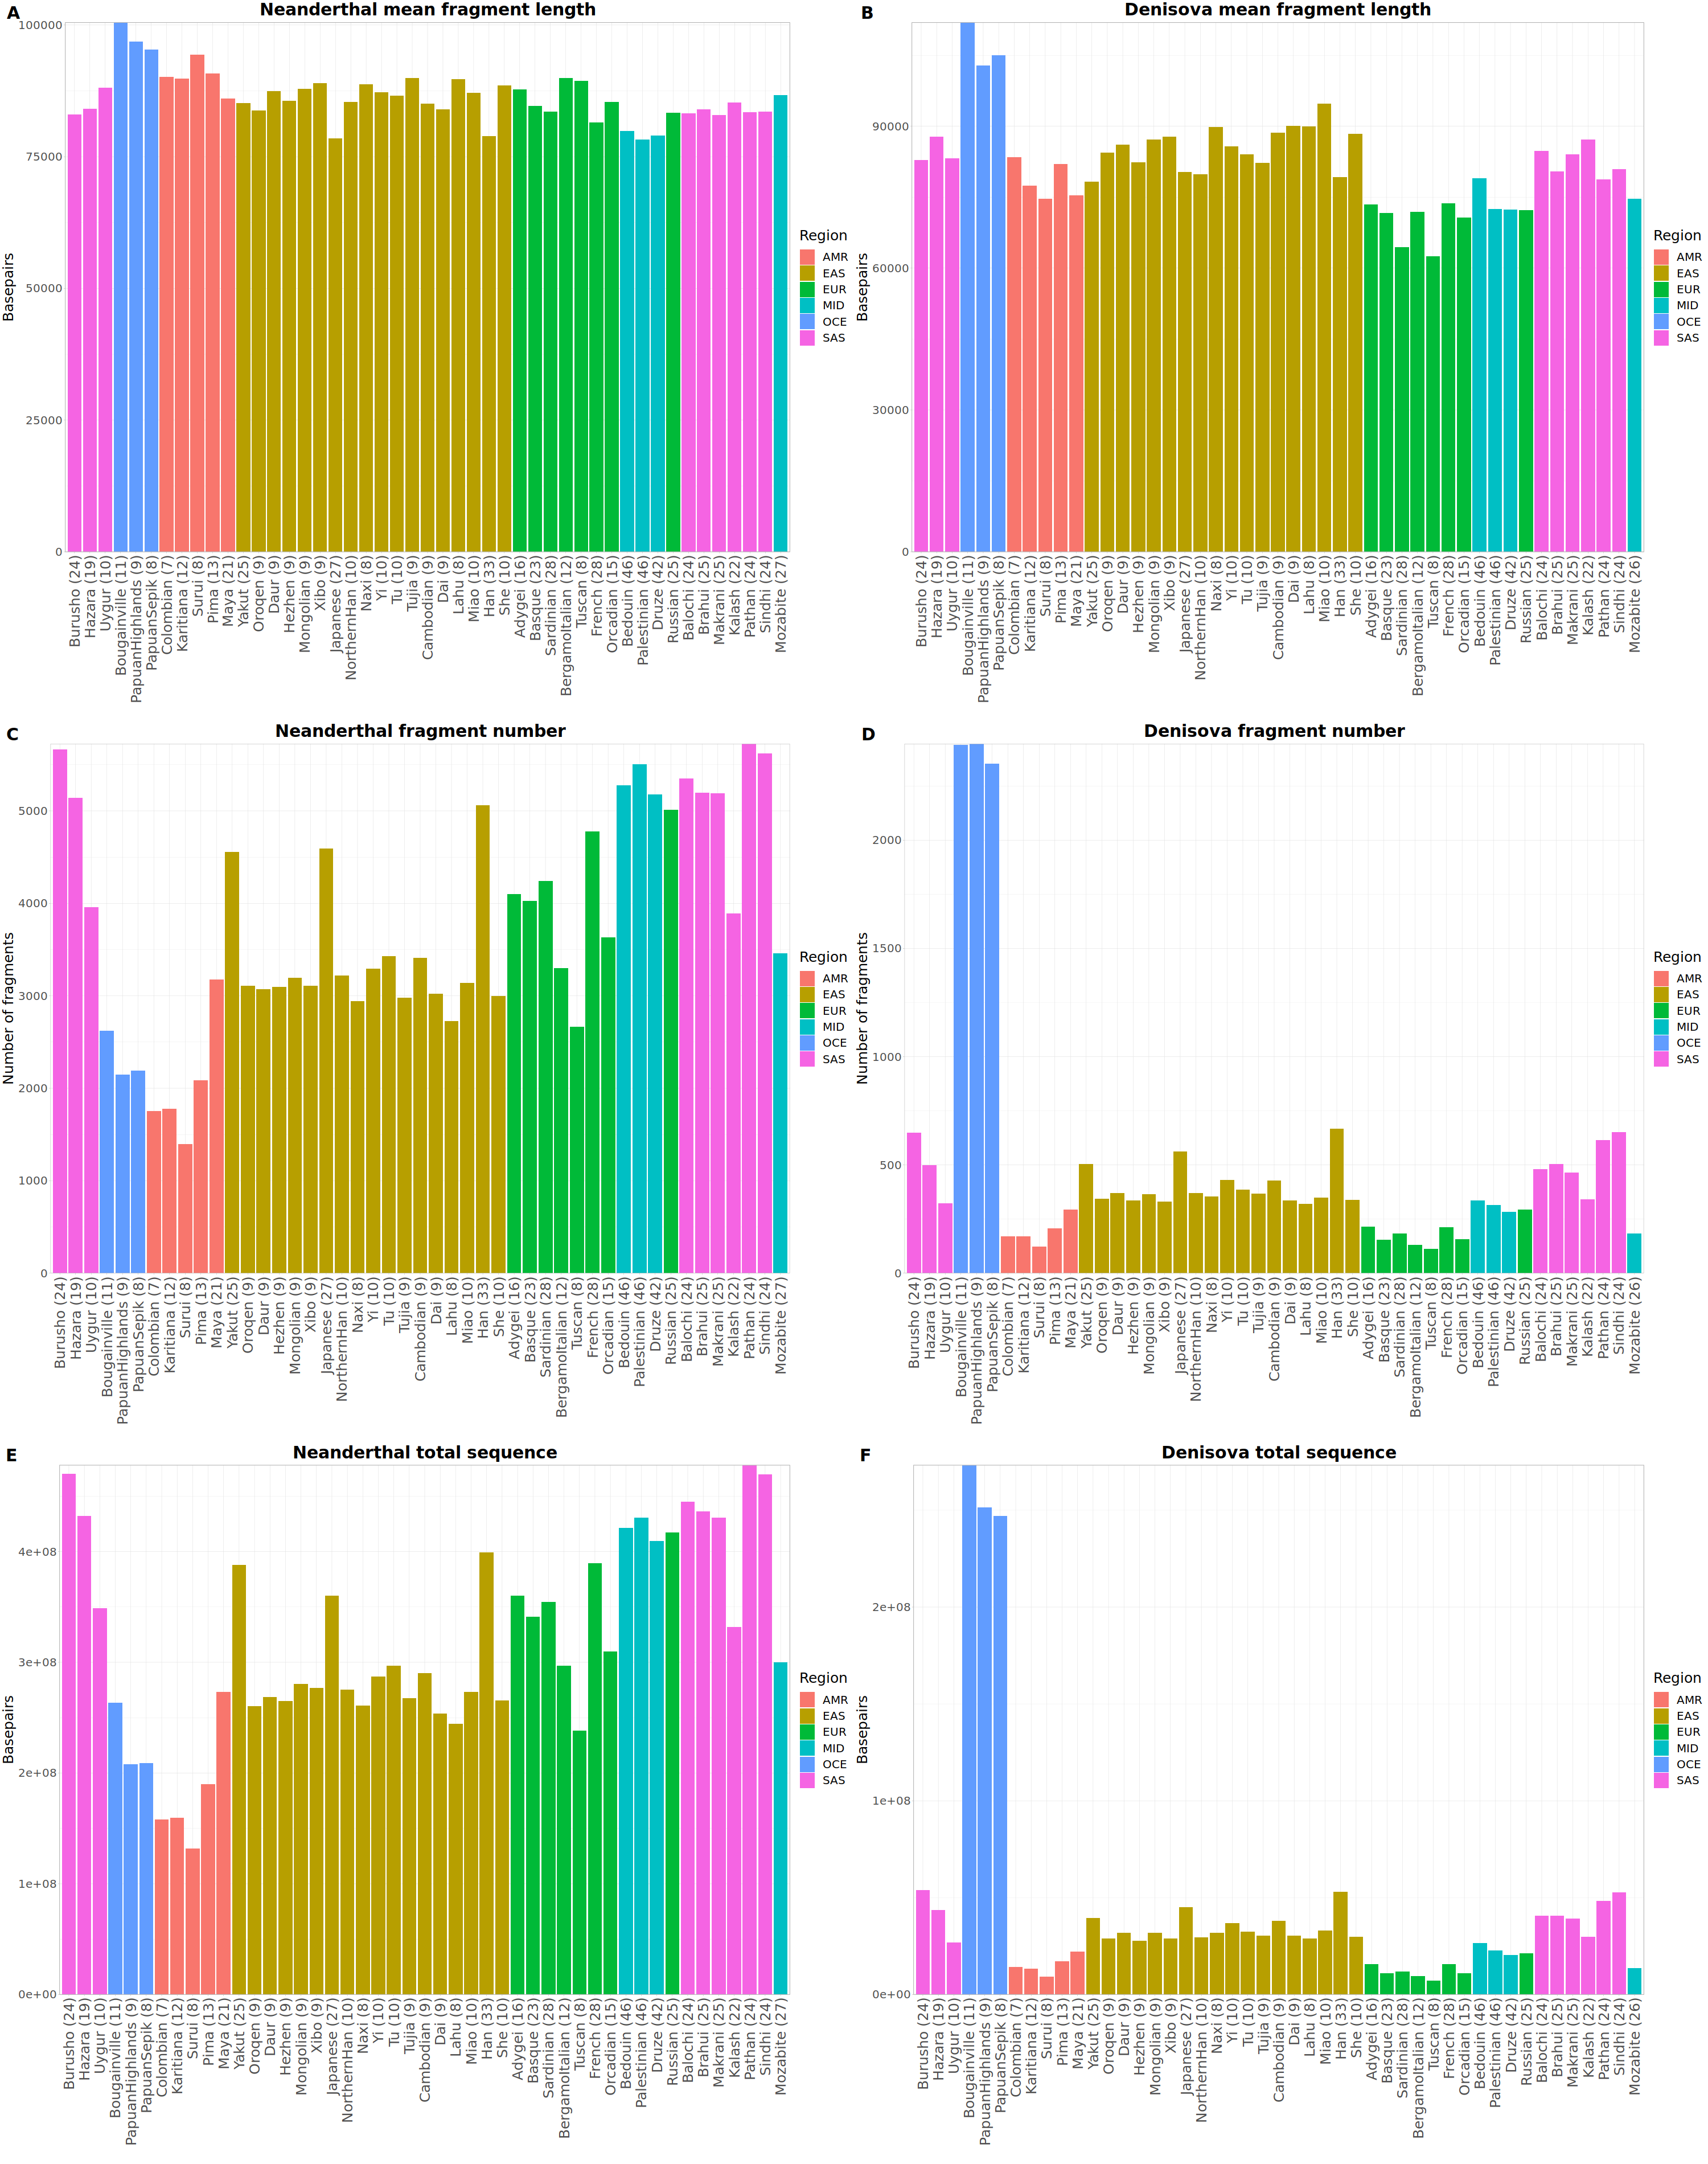

In [2]:
%%R -w 3000 -h 3800

library(tidyverse)
library(cowplot)

pop_order = c('Burusho (24)','Hazara (19)','Uygur (10)','Bougainville (11)','PapuanHighlands (9)','PapuanSepik (8)','Colombian (7)','Karitiana (12)','Surui (8)','Pima (13)', 'Maya (21)','Yakut (25)','Oroqen (9)','Daur (9)','Hezhen (9)','Mongolian (9)','Xibo (9)','Japanese (27)','NorthernHan (10)','Naxi (8)','Yi (10)','Tu (10)','Tujia (9)','Cambodian (9)','Dai (9)','Lahu (8)','Miao (10)','Han (33)','She (10)','Adygei (16)','Basque (23)','Sardinian (28)','BergamoItalian (12)','Tuscan (8)','French (28)','Orcadian (15)','Bedouin (46)','Palestinian (46)','Druze (42)','Russian (25)','Balochi (24)','Brahui (25)','Makrani (25)','Kalash (22)','Pathan (24)','Sindhi (24)','Mozabite (27)')
pop_order2 = c('Burusho (24)','Hazara (19)','Uygur (10)','Bougainville (11)','PapuanHighlands (9)','PapuanSepik (8)','Colombian (7)','Karitiana (12)','Surui (8)','Pima (13)', 'Maya (21)','Yakut (25)','Oroqen (9)','Daur (9)','Hezhen (9)','Mongolian (9)','Xibo (9)','Japanese (27)','NorthernHan (10)','Naxi (8)','Yi (10)','Tu (10)','Tujia (9)','Cambodian (9)','Dai (9)','Lahu (8)','Miao (10)','Han (33)','She (10)','Adygei (16)','Basque (23)','Sardinian (28)','BergamoItalian (12)','Tuscan (8)','French (28)','Orcadian (15)','Bedouin (46)','Palestinian (46)','Druze (42)','Russian (25)','Balochi (24)','Brahui (25)','Makrani (25)','Kalash (22)','Pathan (24)','Sindhi (24)','Mozabite (26)')



df1 <- read.table("../script_results/tables/artificial_genome_summary_neanderthal.txt",sep='\t', header=T)
df2 <- read.table("../script_results/tables/artificial_genome_summary_denisova.txt",sep='\t', header=T)



plot_grid(
    ggplot(df1) +
    geom_col(aes(x=factor(pop_ind_number, level=pop_order),y=mean_frag_len, fill = reg)) +
    theme_light() +
    scale_y_continuous(expand = c(0, 0)) +
    labs(x='',y='Basepairs',title="Neanderthal mean fragment length", fill ='Region') +
    theme(legend.key.size = unit(1, 'cm'), 
    legend.key.height = unit(1, 'cm'), 
    legend.key.width = unit(1, 'cm'), 
    plot.title = element_text(hjust = 0.5, face='bold',size=30),
    legend.title = element_text(size=25), 
    legend.text = element_text(size=20), 
    axis.text=element_text(size=20),
    axis.title=element_text(size=25),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=25)),

    ggplot(df2) +
    geom_col(aes(x=factor(pop_ind_number, level=pop_order2),y=mean_frag_len, fill = reg)) +
    theme_light() +
    scale_y_continuous(expand = c(0, 0)) +
    labs(x='',y='Basepairs',title="Denisova mean fragment length", fill ='Region') +
    theme(legend.key.size = unit(1, 'cm'), 
    legend.key.height = unit(1, 'cm'), 
    legend.key.width = unit(1, 'cm'), 
    plot.title = element_text(hjust = 0.5, face='bold',size=30),
    legend.title = element_text(size=25), 
    legend.text = element_text(size=20), 
    axis.text=element_text(size=20),
    axis.title=element_text(size=25),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=25)),
    
    ggplot(df1) +
    geom_col(aes(x=factor(pop_ind_number, level=pop_order),y=frag_number, fill = reg)) +
    theme_light() +
    scale_y_continuous(expand = c(0, 0)) +
    labs(x='',y='Number of fragments',title="Neanderthal fragment number", fill ='Region') +
    theme(legend.key.size = unit(1, 'cm'), 
    legend.key.height = unit(1, 'cm'), 
    legend.key.width = unit(1, 'cm'), 
    plot.title = element_text(hjust = 0.5, face='bold',size=30),
    legend.title = element_text(size=25), 
    legend.text = element_text(size=20), 
    axis.text=element_text(size=20),
    axis.title=element_text(size=25),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=25)),
    
    ggplot(df2) +
    geom_col(aes(x=factor(pop_ind_number, level=pop_order2),y=frag_number, fill = reg)) +
    theme_light() +
    scale_y_continuous(expand = c(0, 0)) +
    labs(x='',y='Number of fragments',title="Denisova fragment number", fill ='Region') +
    theme(legend.key.size = unit(1, 'cm'), 
    legend.key.height = unit(1, 'cm'), 
    legend.key.width = unit(1, 'cm'), 
    plot.title = element_text(hjust = 0.5, face='bold',size=30),
    legend.title = element_text(size=25), 
    legend.text = element_text(size=20), 
    axis.text=element_text(size=20),
    axis.title=element_text(size=25),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=25)),
    
    ggplot(df1) +
    geom_col(aes(x=factor(pop_ind_number, level=pop_order),y=total_seq_len, fill = reg)) +
    theme_light() +
    scale_y_continuous(expand = c(0, 0)) +
    labs(x='',y='Basepairs',title="Neanderthal total sequence", fill ='Region') +
    theme(legend.key.size = unit(1, 'cm'), 
    legend.key.height = unit(1, 'cm'), 
    legend.key.width = unit(1, 'cm'), 
    plot.title = element_text(hjust = 0.5, face='bold',size=30),
    legend.title = element_text(size=25), 
    legend.text = element_text(size=20), 
    axis.text=element_text(size=20),
    axis.title=element_text(size=25),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=25)),
    
    ggplot(df2) +
    geom_col(aes(x=factor(pop_ind_number, level=pop_order2),y=total_seq_len, fill = reg)) +
    theme_light() +
    scale_y_continuous(expand = c(0, 0)) +
    labs(x='',y='Basepairs',title="Denisova total sequence", fill ='Region') +
    theme(legend.key.size = unit(1, 'cm'), 
    legend.key.height = unit(1, 'cm'), 
    legend.key.width = unit(1, 'cm'), 
    plot.title = element_text(hjust = 0.5, face='bold',size=30),
    legend.title = element_text(size=25), 
    legend.text = element_text(size=20), 
    axis.text=element_text(size=20),
    axis.title=element_text(size=25),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=25)),
    
    
    ncol= 2, 
    labels = "AUTO",
    label_size = 30
)


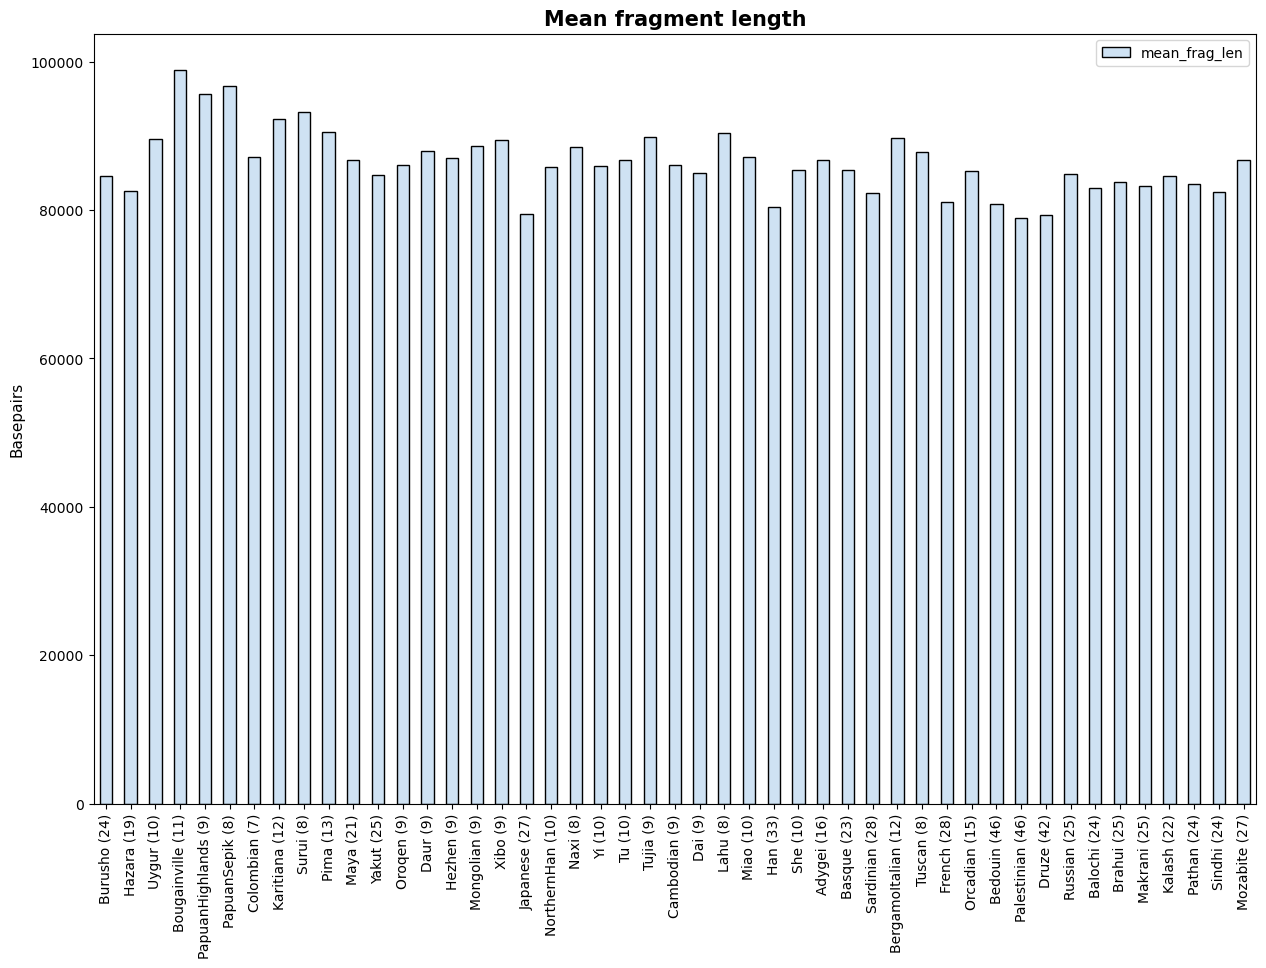

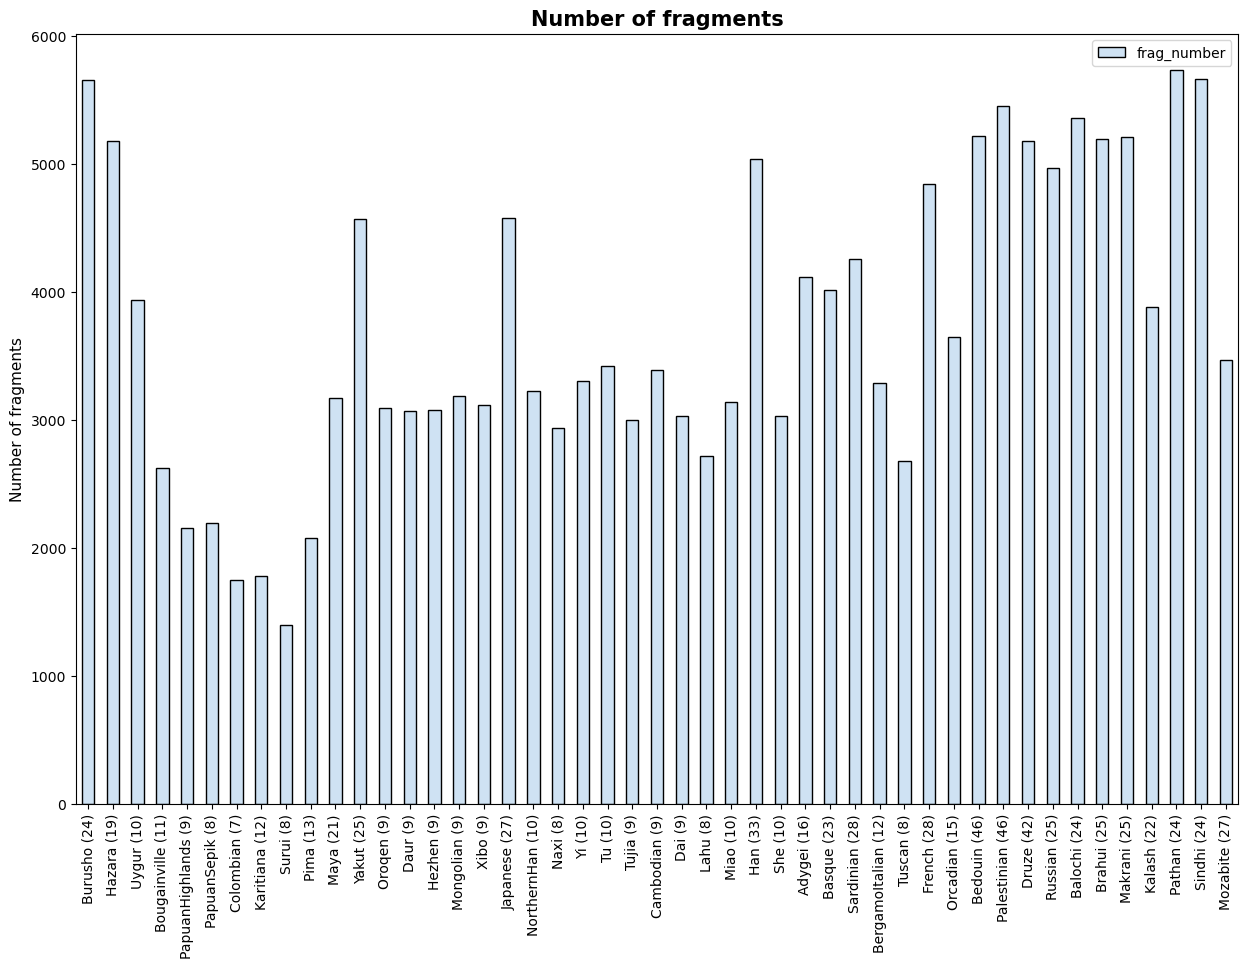

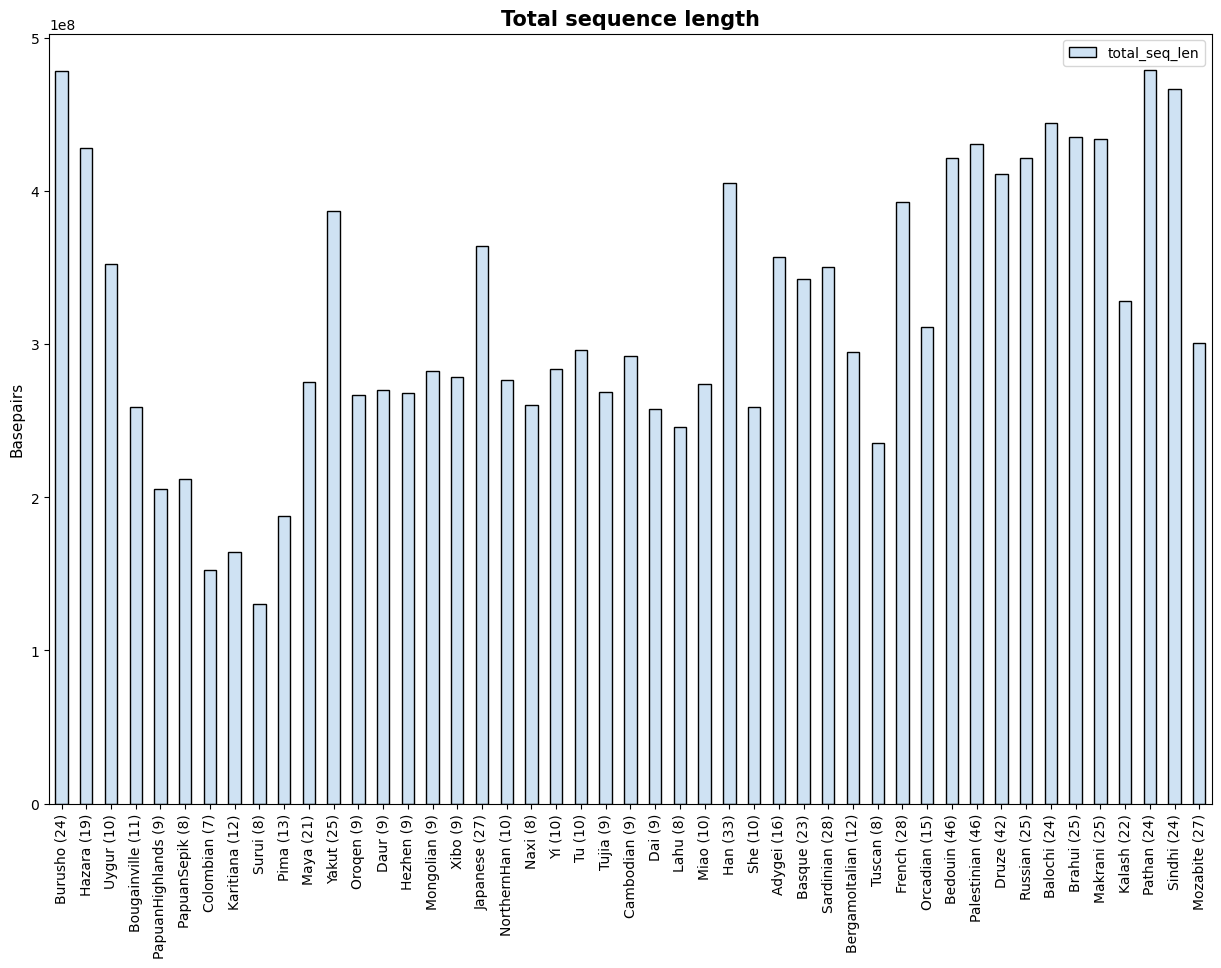

In [3]:
plot_a = results.plot(x = 'pop_ind_number', y = 'mean_frag_len', kind = 'bar', xlabel = '', figsize = (15,10), color = '#CFE2F3',edgecolor='black')
plot_a.set_title("Mean fragment length",weight='bold',fontsize=15)
plot_a.set_ylabel("Basepairs",fontsize=11)
plt.savefig("../script_results/plots/artificial_genome_mean_frag_len_neanderthal.png")

plot_b = results.plot(x = 'pop_ind_number', y = 'frag_number', kind = 'bar', xlabel = '', ylabel = 'Number', figsize = (15,10), color = '#CFE2F3',edgecolor='black')
plot_b.set_title('Number of fragments',weight='bold',fontsize=15)
plot_b.set_ylabel("Number of fragments",fontsize=11)
plt.savefig("../script_results/plots/artificial_genome_frag_number_neanderthal.png")

plot_c = results.plot(x = 'pop_ind_number', y = 'total_seq_len', kind = 'bar', xlabel = '', figsize = (15,10), color = '#CFE2F3',edgecolor='black')
plot_c.set_title('Total sequence length',weight='bold',fontsize=15)
plot_c.set_ylabel("Basepairs",fontsize=11)
plt.savefig("../script_results/plots/artificial_genome_total_seq_len_neanderthal.png")